## Making Injection Recovery Plots

This is the EDA notebook for the injected comets using the `injection_tests.py` script. The script has been designed to work with the `.pkl` files, and has not yet been adapted to work with any `.fits` files. To produce the plot in the steps below:
- Run the script on your lightcurve sample (if you are running between each magnitude, I would suggest doing magnitudes one by one)
- glob the files together to create one large dataframe (as below)
- run the steps to create the injection-recovery plot

### Importing modules

In [1]:
import os

os.chdir("../")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math
from scripts.analysis_tools_cython import *
from glob import glob

### Concatenating the output files into one DataFrame

As each outpout file is a csv based on the magnitude ranges, I concatenate them to one DataFrame to produce the plot.

In [3]:
files = glob("injection_recovery_100percent_8day/sector_6/*.csv")
files

['injection_recovery_100percent_8day/sector_6/tmag_12_tmag_13.csv',
 'injection_recovery_100percent_8day/sector_6/tmag_6_tmag_7.csv',
 'injection_recovery_100percent_8day/sector_6/tmag_14_tmag_15.csv',
 'injection_recovery_100percent_8day/sector_6/tmag_9_tmag_10.csv',
 'injection_recovery_100percent_8day/sector_6/tmag_8_tmag_9.csv',
 'injection_recovery_100percent_8day/sector_6/tmag_10_tmag_11.csv',
 'injection_recovery_100percent_8day/sector_6/tmag_11_tmag_12.csv',
 'injection_recovery_100percent_8day/sector_6/tmag_7_tmag_8.csv',
 'injection_recovery_100percent_8day/sector_6/tmag_13_tmag_14.csv']

In [4]:
cols = [
    "file",
    "path",
    "signal",
    "snr",
    "time",
    "asym_score",
    "width1",
    "width2",
    "duration",
    "depth",
    "peak_lspower",
    "mstat",
    "skewness",
    "skewness_error",
    "transit_prob",
    "recovered",
    "mag",
    "injected_depth",
    "injected_time",
    "percentage_change",
    # "injected_asym_score"
]

In [5]:
def make_df(files):
    li = []

    for filename in files:
        df = pd.read_csv(filename, index_col=0)
        df.columns = cols
        li.append(df)

    return pd.concat(li, axis=0, ignore_index=True)

In [6]:
frame = make_df(files)

9000

In [7]:
frame

,file,path,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob,recovered,mag,injected_depth,injected_time,percentage_change
0,tesslcs_sector_6_104/tesslcs_tmag_12_13/tesslc...,tesslc_346645163.pkl,-4.936656,-3.058194,1473.682184,1.000271,0.348053,0.689562,1.000004,-0.001272,0.029328,-0.001,-1.497993,3.579647e+00,maybeTransit,0,12.9060,0.000234,1482.744749,443.252102
1,tesslcs_sector_6_104/tesslcs_tmag_12_13/tesslc...,tesslc_59844991.pkl,-8.789238,-2.353432,1484.744017,1.006646,0.816223,0.353813,2.333332,-0.000498,0.099407,-0.076,5786.682117,1.017312e+08,maybeTransit,0,12.5640,0.000569,1487.764827,-12.496196
2,tesslcs_sector_6_104/tesslcs_tmag_12_13/tesslc...,tesslc_278777919.pkl,-8.630081,-2.961510,1470.636623,1.011050,0.303529,0.127804,0.479170,-0.002923,0.093656,0.026,-1.601152,1.218135e+00,maybeTransit,0,12.1095,0.002754,1479.261697,6.140205
3,tesslcs_sector_6_104/tesslcs_tmag_12_13/tesslc...,tesslc_170161440.pkl,-9.535645,-5.452253,1471.138007,0.999562,0.247853,0.129997,0.520839,-0.001458,0.035663,0.039,-0.044431,5.980479e+02,maybeTransit,1,12.4147,0.001390,1471.179674,4.934120
4,tesslcs_sector_6_104/tesslcs_tmag_12_13/tesslc...,tesslc_53746281.pkl,-5.334628,-3.791830,1485.931494,1.057797,0.223942,0.000114,0.395839,-0.001711,0.036411,0.029,-3554.602604,1.033905e+08,maybeTransit,0,12.8064,0.000684,1476.535536,150.198520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,tesslcs_sector_6_104/tesslcs_tmag_13_14/tesslc...,tesslc_707626979.pkl,-10.151310,-2.832314,1475.660963,0.564018,0.100888,1.930402,1.062500,-0.001775,0.144953,0.154,-1.304619,1.886161e+00,maybeTransit,0,13.9664,0.000647,1475.577629,174.244581
8996,tesslcs_sector_6_104/tesslcs_tmag_13_14/tesslc...,tesslc_281309980.pkl,-5.079201,-5.077316,1475.412078,-3.000000,-3.000000,-3.000000,0.020833,-3.000000,0.065430,-0.034,-3.000000,-3.000000e+00,point,0,13.2367,0.002056,1471.245339,145796.829803
8997,tesslcs_sector_6_104/tesslcs_tmag_13_14/tesslc...,tesslc_207016553.pkl,-8.076918,-5.303683,1479.579039,0.592973,0.039019,0.161678,0.395834,-0.007676,0.027945,0.037,-38.290138,1.194728e+02,artefact,0,13.9699,0.003606,1479.516538,112.853104
8998,tesslcs_sector_6_104/tesslcs_tmag_13_14/tesslc...,tesslc_20232253.pkl,-4.199446,-3.146782,1472.430492,-2.000000,-2.000000,-2.000000,2.124989,-2.000000,0.017291,0.075,-2.000000,-2.000000e+00,end,0,13.8397,0.000480,1480.534648,416820.614616


### Recovered Comet Transits

In [8]:
frame_recovered = frame.loc[(frame.recovered == 1)]
frame_recovered

,file,path,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,skewness,skewness_error,transit_prob,recovered,mag,injected_depth,injected_time,percentage_change
3,tesslcs_sector_6_104/tesslcs_tmag_12_13/tesslc...,tesslc_170161440.pkl,-9.535645,-5.452253,1471.138007,0.999562,0.247853,0.129997,0.520839,-0.001458,0.035663,0.039,-0.044431,5.980479e+02,maybeTransit,1,12.4147,0.001390,1471.179674,4.934120
6,tesslcs_sector_6_104/tesslcs_tmag_12_13/tesslc...,tesslc_234085943.pkl,-15.737679,-6.135078,1472.078658,0.805385,0.145899,0.203668,0.458338,-0.008859,0.069198,0.198,-1.116969,1.005203e+00,maybeTransit,1,12.5666,0.008692,1472.036990,1.919534
7,tesslcs_sector_6_104/tesslcs_tmag_12_13/tesslc...,tesslc_350341634.pkl,-20.354944,-5.487704,1485.991198,1.013717,0.278957,0.258927,0.666661,-0.006423,0.093855,0.312,1.452043,6.116047e-01,maybeTransit,1,12.7000,0.006776,1486.095363,-5.218180
9,tesslcs_sector_6_104/tesslcs_tmag_12_13/tesslc...,tesslc_276793676.pkl,-11.414005,-3.279778,1474.594206,1.092861,0.231598,0.000162,0.854163,-0.003516,0.098392,0.173,-43.935682,1.181551e+03,maybeTransit,1,12.4901,0.004393,1474.573373,-19.955876
10,tesslcs_sector_6_104/tesslcs_tmag_12_13/tesslc...,tesslc_232135491.pkl,-15.879738,-5.712748,1473.599596,1.036167,0.206059,0.241219,0.541661,-0.005314,0.048822,0.267,2.439596,9.523618e-01,maybeTransit,1,12.8839,0.004623,1473.641263,14.938225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,tesslcs_sector_6_104/tesslcs_tmag_13_14/tesslc...,tesslc_53493199.pkl,-6.354166,-3.696107,1479.578614,0.901788,0.140539,0.460584,0.625005,-0.004752,0.030644,-0.113,-0.000198,8.140516e+06,artefact,1,13.9936,0.004132,1479.536947,15.015916
8988,tesslcs_sector_6_104/tesslcs_tmag_13_14/tesslc...,tesslc_12163223.pkl,-9.605478,-5.893034,1479.536860,0.550650,0.320116,0.173572,0.583329,-0.005532,0.022206,0.105,-0.017039,1.267254e+04,artefact,1,13.7667,0.006956,1479.516027,-20.469006
8989,tesslcs_sector_6_104/tesslcs_tmag_13_14/tesslc...,tesslc_279539906.pkl,-10.340117,-4.878961,1475.599090,1.036760,0.247935,0.411978,0.624989,-0.006928,0.041733,0.042,3.023937,1.458673e+00,maybeTransit,1,13.5347,0.006366,1475.661589,8.836069
8993,tesslcs_sector_6_104/tesslcs_tmag_13_14/tesslc...,tesslc_442956930.pkl,-8.916919,-4.788788,1474.452755,1.028215,0.231409,0.527096,0.812481,-0.003535,0.022369,0.142,3.835876,2.585917e+00,maybeTransit,1,13.2006,0.003636,1474.452755,-2.781755


### Setting up Injection-Recovery plot

This is the main code to produce the plot:

In [9]:
depth_edges = np.logspace(-4, -2, 15)  # depth bins
nbins_depth = len(depth_edges) - 1
mag_edges = np.arange(6, 16, 1)  # magnitude bins
nbins_mag = len(mag_edges) - 1

## all objects
hist_full, magvals_full, depthvals_full = np.histogram2d(
    frame.mag, frame.injected_depth, bins=[mag_edges, depth_edges]
)

## recovered objects
hist_recovered, magvals_recovered, depthvals_recovered = np.histogram2d(
    frame_recovered.mag, frame_recovered.injected_depth, bins=[mag_edges, depth_edges]
)


pi = np.vstack(([np.array([p for r in depthvals_full]) for p in magvals_full]))
ri = np.vstack(([np.array([r for r in depthvals_full]) for p in magvals_full]))
frac_hist = hist_recovered / hist_full
frac_hist = np.nan_to_num(frac_hist)

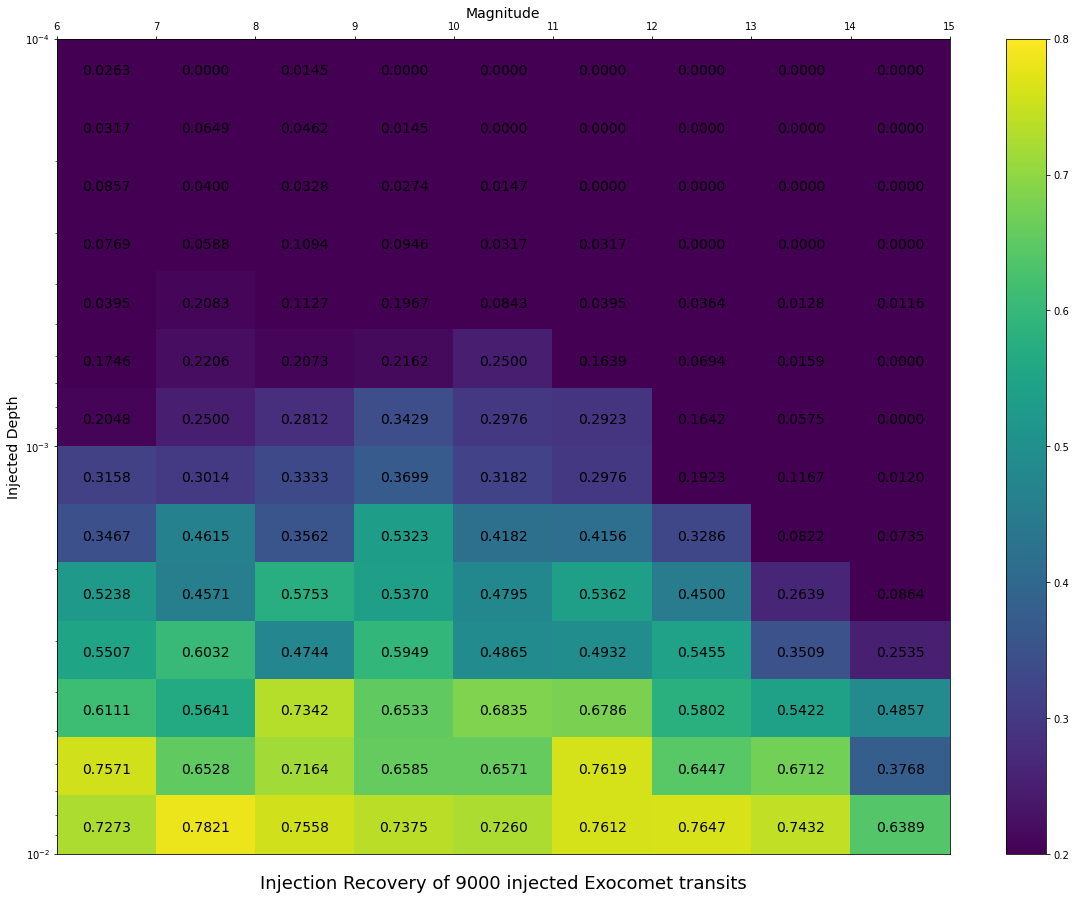

In [11]:
fig, (ax1) = plt.subplots(1, figsize=(20, 15), sharey=True, sharex=True)
im = ax1.pcolormesh(pi, (ri), frac_hist, vmin=0.2, vmax=0.8)

for i in range(len(mag_edges) - 1):
    for j in range(len(depth_edges) - 1):
        pval = np.mean(mag_edges[[i, i + 1]])
        rval = np.mean(depth_edges[[j, j + 1]])
        hval = frac_hist[i, j]
        ax1.annotate(
            f"{hval:.4f}",
            xy=(pval, rval),  # multiply hval by 100 here for percentage
            ha="center",
            va="center",
            size=14,
        )

ax1.set_ylabel("Injected Depth", fontsize=14)
ax1.set_yscale("log")
ax1.set_xlabel("Magnitude", fontsize=14)
ax1.set_title(
    f"Injection Recovery of {len(frame)} injected Exocomet transits",
    fontsize=18,
    y=-0.05,
)
ax1.xaxis.set_label_position("top")
ax1.xaxis.tick_top()
fig.colorbar(im, ax=ax1)
plt.gca().invert_yaxis()
# Save to a new directory
# try:
#     os.makedirs("ir_plotsv3/")
# except:
#     pass
# savefile = str(input("save plot as:"))
# plt.savefig(f"ir_plotsv3/{savefile}.png",dpi=300)
plt.show()

Injection recovery plot done!

---

### What fraction of stars are in each magnitude?

In [13]:
data = pd.read_csv("/storage/astro2/phrdhx/tesslcs/sector6lookup.csv")

In [22]:
frac_hist[:, -7]

array([0.29187576, 0.30132589, 0.3283375 , 0.34948338, 0.33651551,
       0.25783535, 0.12432815, 0.04056656, 0.02696722])

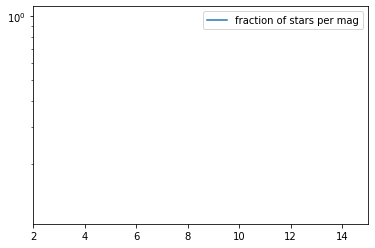

In [25]:
count, bins_count = np.histogram(frame_recovered.injected_depth, bins=10)
pdf = count / sum(count)
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="fraction of stars per mag")
# plt.plot(bins_count[1:], cdf2,label='fraction of transits recovered in inj-rec')
plt.yscale("log")
plt.xlim(2, 15)
plt.legend()

In [17]:
hist_recovered, magvals_recovered, depthvals_recovered = np.histogram2d(
    frame_recovered.mag, frame_recovered.injected_depth, bins=[mag_edges, depth_edges]
)

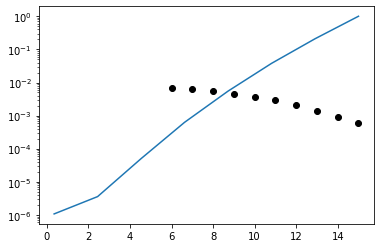

In [23]:
count, bins_count = np.histogram(data.Magnitude, bins=8)
pdf = count / sum(count)
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="fraction of stars per mag")
plt.plot(6, (frac_hist[:, -1].sum() / 100000) * 100, marker="o", color="black")
plt.plot(7, (frac_hist[:, -2].sum() / 100000) * 100, marker="o", color="black")
plt.plot(8, (frac_hist[:, -3].sum() / 100000) * 100, marker="o", color="black")
plt.plot(9, (frac_hist[:, -4].sum() / 100000) * 100, marker="o", color="black")
plt.plot(10, (frac_hist[:, -5].sum() / 100000) * 100, marker="o", color="black")
plt.plot(11, (frac_hist[:, -6].sum() / 100000) * 100, marker="o", color="black")
plt.plot(12, (frac_hist[:, -7].sum() / 100000) * 100, marker="o", color="black")
plt.plot(13, (frac_hist[:, -8].sum() / 100000) * 100, marker="o", color="black")
plt.plot(14, (frac_hist[:, -9].sum() / 100000) * 100, marker="o", color="black")
plt.plot(15, (frac_hist[:, -10].sum() / 100000) * 100, marker="o", color="black")

plt.yscale("log")

In [176]:
frac_hist[:, -10].sum() / 10000 * 100

0.007973931815171953

In [158]:
count2, bins_count2 = np.histogram(frame_recovered.mag, bins=8)

In [168]:
(frac_hist[:, -1].sum() / 10000) * 100

0.06827981719800125

In [149]:
count2, bins_count = np.histogram(frame_recovered.mag, bins=8)

In [150]:
pdf2 = count2 / sum(count2)
cdf2 = np.cumsum(pdf2)

cdf2

array([0.13699281, 0.2823856 , 0.42635404, 0.57664074, 0.72017092,
       0.84496549, 0.93827837, 1.        ])

Text(0.5, 0, 'mag')

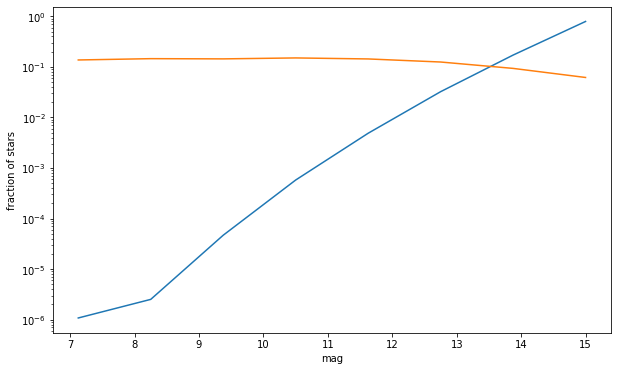

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(bins_count[1:], pdf, label="fraction of stars per mag")
plt.plot(bins_count[1:], pdf2, label="fraction of transits recovered in inj-rec")
# plt.plot(bins_count[1:], pdf-pdf2,label='fraction of transits recovered in inj-rec')

plt.yscale("log")
plt.ylabel("fraction of stars")
plt.xlabel("mag")

In [147]:
pdf2 = frac_hist / sum(frac_hist)
cdf2 = np.cumsum(pdf2)

In [86]:
tmag_6_7 = sum(frac_hist[0, :]) / len(frac_hist[0, :])
tmag_7_8 = sum(frac_hist[1, :]) / len(frac_hist[1, :])
tmag_8_9 = sum(frac_hist[2, :]) / len(frac_hist[2, :])
tmag_9_10 = sum(frac_hist[3, :]) / len(frac_hist[3, :])
tmag_10_11 = sum(frac_hist[4, :]) / len(frac_hist[4, :])
tmag_11_12 = sum(frac_hist[5, :]) / len(frac_hist[5, :])
tmag_12_13 = sum(frac_hist[6, :]) / len(frac_hist[6, :])
tmag_13_14 = sum(frac_hist[7, :]) / len(frac_hist[7, :])
tmag_14_15 = sum(frac_hist[8, :]) / len(frac_hist[8, :])

In [87]:
cdf_6_7 = np.cumsum(tmag_6_7)
cdf_7_8 = np.cumsum(tmag_7_8)
cdf_8_9 = np.cumsum(tmag_8_9)
cdf_9_10 = np.cumsum(tmag_9_10)
cdf_10_11 = np.cumsum(tmag_10_11)
cdf_11_12 = np.cumsum(tmag_11_12)
cdf_12_13 = np.cumsum(tmag_12_13)
cdf_13_14 = np.cumsum(tmag_13_14)
cdf_14_15 = np.cumsum(tmag_14_15)

In [90]:
cdf_6_7

array([0.34531424])

and done!

---

## EDA of some of noiseless lightcurves

We generate noiseless lightcurves and use this in our initial injection-recovery to illustrate how our pipeline should behave. Here is just a sandbox of specific things to see what the injection-recovery plot tell us about our lightcurves. Some examples may include:
- Looking at specific bins to see what lightcurves exactly were not recovered
- The trend of lightcurves at specific depths

#### Why do some lightcurves not get recovered?

In [11]:
non_recovered = frame.loc[(frame.recovered == 0) & (frame.mag >= 7) & (frame.mag <= 8)]
non_recovered.head()

,file,path,signal,snr,time,asym_score,width1,width2,duration,depth,peak_lspower,mstat,transit_prob,recovered,mag,injected_depth,injected_time,percentage_change
48010,tesslcs_sector_6_104/tesslcs_tmag_7_8/tesslc_2...,tesslc_232271055.pkl,-28.862591,-6.314473,1476.370458,1.088190,0.233573,0.120792,0.437497,-0.002187,0.088060,0.907,maybeTransit,0,7.5374,0.002762,1476.578791,-20.829228
48014,tesslcs_sector_6_104/tesslcs_tmag_7_8/tesslc_3...,tesslc_364540337.pkl,-28.163183,-5.706744,1475.968753,0.916614,0.272049,0.148429,0.583332,-0.000119,0.069266,0.601,maybeTransit,0,7.3586,0.000143,1476.072919,-16.488024
48022,tesslcs_sector_6_104/tesslcs_tmag_7_8/tesslc_1...,tesslc_161570162.pkl,-30.382484,-5.670252,1476.492092,1.366915,0.295703,0.115963,0.624986,-0.000460,0.096896,0.960,maybeTransit,0,7.8953,0.000553,1476.637922,-16.943284
48030,tesslcs_sector_6_104/tesslcs_tmag_7_8/tesslc_1...,tesslc_151585020.pkl,-28.235264,-5.707609,1475.992164,0.922761,0.267285,0.138223,0.583330,-0.000105,0.065719,0.636,maybeTransit,0,7.6481,0.000127,1476.096331,-17.883459
48042,tesslcs_sector_6_104/tesslcs_tmag_7_8/tesslc_2...,tesslc_281313631.pkl,-30.853764,-6.922456,1471.224640,1.176401,0.282231,0.081852,0.562503,-0.003300,0.114587,0.961,maybeTransit,0,7.7585,0.003806,1471.328809,-13.298785


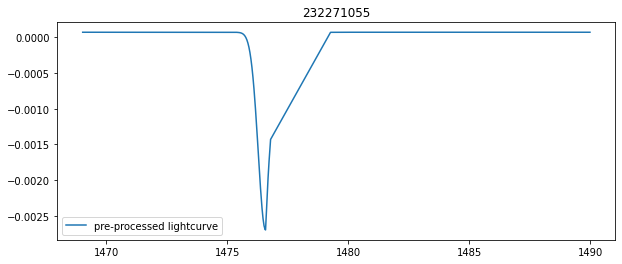

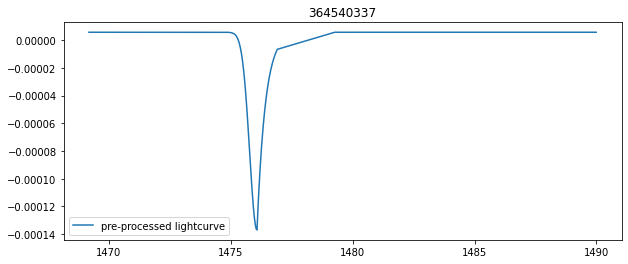

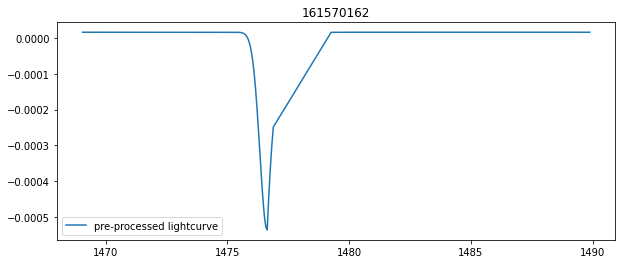

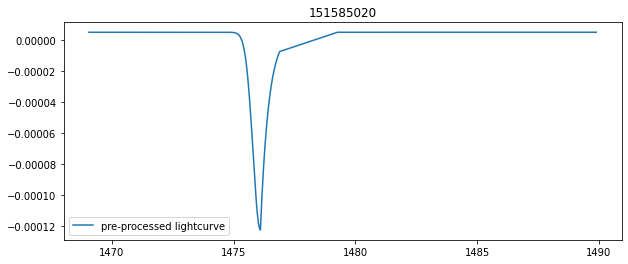

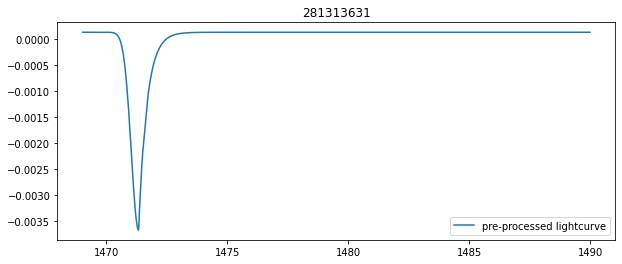

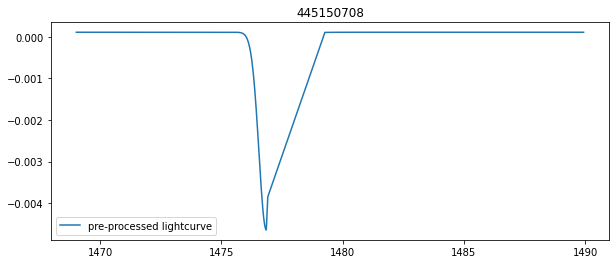

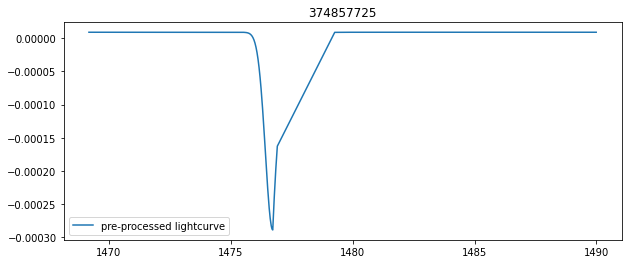

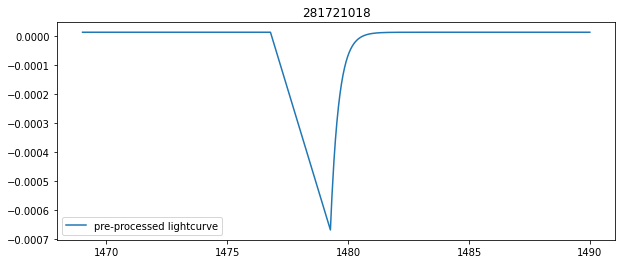

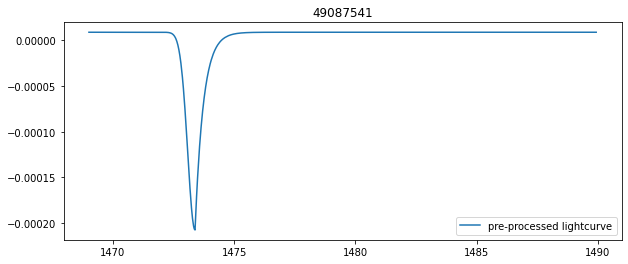

In [12]:
for i, j in zip(
    non_recovered.file.head(30),
    non_recovered.path.str.split("_").str[1].str.split(".pkl").str[0].values,
):
    data = np.load(f"injection_recovery_data_arrays_100percent_noiselessv2/{j}.npz")
    plt.figure(figsize=(10, 4))
    plt.plot(
        data["original_time"],
        normalise_flux(data["original_flux"]),
        label="pre-processed lightcurve",
    )
    # plt.plot(data['time'],data['flux'],label='processed lightcurve')

    # plt.axvline(non_recovered.injected_time.values[non_recovered.path.str.split('_').str[1].str.split('.pkl').str[0].values == j],linewidth=5,c='red',label='injected time',zorder=1,alpha=0.1)
    # plt.axvline(nonrecoveed_explore.time.values[nonrecoveed_explore.path.str.split('_').str[1].str.split('.pkl').str[0].values == j],linewidth=5,c='black',label='recovered time')
    plt.legend()
    plt.title(f"{j}")
    plt.show()

The lightcurves shown here are too close to the edge or inside the data gap. So, overall, our injection-recovery code works.